In [1]:
#importanmos libreria
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt

# Visualizaciones
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import missingno as ms

# IGNORAR ERRORES
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [2]:
#analisis exploratorio
df_data=pds.read_csv(r'C:\Users\Miguel\Documents\PROYECTOS DE PYTHON\FALLECIDOS\fallecidos_sinadef.csv',sep='|')

In [3]:
#identificar la cantidad de columna y fila
df_data.shape

(1110168, 32)

In [4]:
#MOSTRAR COLUMNAS
df_data.columns

Index(['Nº', 'TIPO SEGURO', 'SEXO', 'EDAD', 'TIEMPO EDAD', 'ESTADO CIVIL',
       'NIVEL DE INSTRUCCIÓN', 'ETNIA', 'COD# UBIGEO DOMICILIO',
       'PAIS DOMICILIO', 'DEPARTAMENTO DOMICILIO', 'PROVINCIA DOMICILIO',
       'DISTRITO DOMICILIO', 'FECHA', 'AÑO', 'MES', 'TIPO LUGAR',
       'INSTITUCION', 'MUERTE VIOLENTA', 'NECROPSIA', 'DEBIDO A (CAUSA A)',
       'CAUSA A (CIE-X)', 'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)',
       'DEBIDO A (CAUSA C)', 'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)',
       'CAUSA D (CIE-X)', 'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)',
       'DEBIDO A (CAUSA F)', 'CAUSA F (CIE-X)'],
      dtype='object')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110168 entries, 0 to 1110167
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Nº                      1110168 non-null  int64 
 1   TIPO SEGURO             1110168 non-null  object
 2   SEXO                    1110168 non-null  object
 3   EDAD                    1110168 non-null  object
 4   TIEMPO EDAD             1110168 non-null  object
 5   ESTADO CIVIL            1110168 non-null  object
 6   NIVEL DE INSTRUCCIÓN    1110168 non-null  object
 7   ETNIA                   1110168 non-null  object
 8   COD# UBIGEO DOMICILIO   1110168 non-null  object
 9   PAIS DOMICILIO          1110006 non-null  object
 10  DEPARTAMENTO DOMICILIO  1110006 non-null  object
 11  PROVINCIA DOMICILIO     1110006 non-null  object
 12  DISTRITO DOMICILIO      1110006 non-null  object
 13  FECHA                   1110168 non-null  object
 14  AÑO               

In [6]:
#identificar la cantidad de tipos de datos que tengas las columnas
def columna_unicas(data):
    for i in range(len(data.columns)):
        nom=data.columns[i]
        tot_values=len(data[nom].unique())
        print(f'{nom} tiene : {tot_values} valores unicos')
        print("="*20)


In [7]:
columna_unicas(df_data)

Nº tiene : 1110168 valores unicos
TIPO SEGURO tiene : 13 valores unicos
SEXO tiene : 4 valores unicos
EDAD tiene : 233 valores unicos
TIEMPO EDAD tiene : 7 valores unicos
ESTADO CIVIL tiene : 9 valores unicos
NIVEL DE INSTRUCCIÓN tiene : 12 valores unicos
ETNIA tiene : 75 valores unicos
COD# UBIGEO DOMICILIO tiene : 5723 valores unicos
PAIS DOMICILIO tiene : 90 valores unicos
DEPARTAMENTO DOMICILIO tiene : 140 valores unicos
PROVINCIA DOMICILIO tiene : 202 valores unicos
DISTRITO DOMICILIO tiene : 1741 valores unicos
FECHA tiene : 2682 valores unicos
AÑO tiene : 8 valores unicos
MES tiene : 12 valores unicos
TIPO LUGAR tiene : 8 valores unicos
INSTITUCION tiene : 15 valores unicos
MUERTE VIOLENTA tiene : 9 valores unicos
NECROPSIA tiene : 3 valores unicos
DEBIDO A (CAUSA A) tiene : 78569 valores unicos
CAUSA A (CIE-X) tiene : 4343 valores unicos
DEBIDO A (CAUSA B) tiene : 100035 valores unicos
CAUSA B (CIE-X) tiene : 5420 valores unicos
DEBIDO A (CAUSA C) tiene : 88718 valores unicos
C

In [8]:
#concentracion de la informacion
def frecuencia(data):
    for i in range(len(data.columns)):
        nom=data.columns[i]
        tot_values=data[nom].value_counts()
        print(nom.center(30,"-"))
        print(tot_values)
        print("="*20)

In [9]:
frecuencia(df_data)

--------------Nº--------------
Nº
1          1
740118     1
740104     1
740105     1
740106     1
          ..
370062     1
370063     1
370064     1
370065     1
1110168    1
Name: count, Length: 1110168, dtype: int64
---------TIPO SEGURO----------
TIPO SEGURO
SIS              549877
ESSALUD          340009
IGNORADO         145604
PRIVADOS          18737
SANIDAD PNP       16793
OTROS             15481
USUARIO           14264
SANIDAD NAVAL      2955
SANIDAD EP         2837
SANIDAD FAP        2578
EXONERADO           996
SOAT                 36
SIN REGISTRO          1
Name: count, dtype: int64
-------------SEXO-------------
SEXO
MASCULINO        614284
FEMENINO         495772
INDETERMINADO       103
SIN REGISTRO          9
Name: count, dtype: int64
-------------EDAD-------------
EDAD
82     14872
83     14764
84     14727
85     14667
81     14479
       ...  
113        5
113        5
115        4
114        3
114        3
Name: count, Length: 233, dtype: int64
---------TIEMPO EDAD---

In [10]:
#identificar los datos nulos
def obtener_valores_vacios(data):
    tot_na=0
    for i in range(len(data.columns.to_list())):
        
        nom=data.columns[i]
        tot_null=pds.isnull(data[nom]).sum()
        tot_na=tot_null+tot_na
        #agregar a la areglo
        if tot_null>0:
            print(f'La columna {nom} tiene : {tot_null}  valores vacios')

    print("="*60)
    print(f"total valores vacios : {tot_na}")

In [11]:
obtener_valores_vacios(df_data)

La columna PAIS DOMICILIO tiene : 162  valores vacios
La columna DEPARTAMENTO DOMICILIO tiene : 162  valores vacios
La columna PROVINCIA DOMICILIO tiene : 162  valores vacios
La columna DISTRITO DOMICILIO tiene : 162  valores vacios
La columna INSTITUCION tiene : 1  valores vacios
La columna MUERTE VIOLENTA tiene : 25657  valores vacios
La columna DEBIDO A (CAUSA A) tiene : 425  valores vacios
La columna CAUSA A (CIE-X) tiene : 42453  valores vacios
La columna DEBIDO A (CAUSA B) tiene : 32149  valores vacios
La columna CAUSA B (CIE-X) tiene : 68719  valores vacios
La columna DEBIDO A (CAUSA C) tiene : 98110  valores vacios
La columna CAUSA C (CIE-X) tiene : 124984  valores vacios
La columna DEBIDO A (CAUSA D) tiene : 185715  valores vacios
La columna CAUSA D (CIE-X) tiene : 196328  valores vacios
La columna DEBIDO A (CAUSA E) tiene : 185467  valores vacios
La columna CAUSA E (CIE-X) tiene : 193413  valores vacios
La columna DEBIDO A (CAUSA F) tiene : 213091  valores vacios
La columna C

In [12]:
#visualizacion de comportamiento de mortalidad
def  visualizacion_valor(data,columns,indice):
    total=len(data[indice])

    for col in columns:
        valores=data[col].unique().tolist()
        datos=[len(data[indice][data[col]==valor]) for valor in valores]
        size = [(45, 25), 30] if len(valores) > 6 else [(8, 8), 12]
        porcentaje=100/total
        plt.figure(figsize=size[0])
        plt.bar(valores,datos,color='maroon',width=.9)

        for index, valor in enumerate(datos):
            plt.text(x = index , y = valor , s = f"{valor}" , fontdict = dict(fontsize = size[1]), ha = 'right')
            plt.text(x = index , y = valor , s = f"({np.round(valor * porcentaje, 2)})%" , 
                        fontdict = dict(fontsize = size[1]), ha = 'left')
            
        plt.title('MORTALIDAD ({})'.format(col), fontsize = size[1])
        #plt.xlabel('Valores')
        plt.ylabel('Intervalos de la MORTANIDAD ({} - {})'.format(indice ,col), fontsize = size[1])
        plt.show()

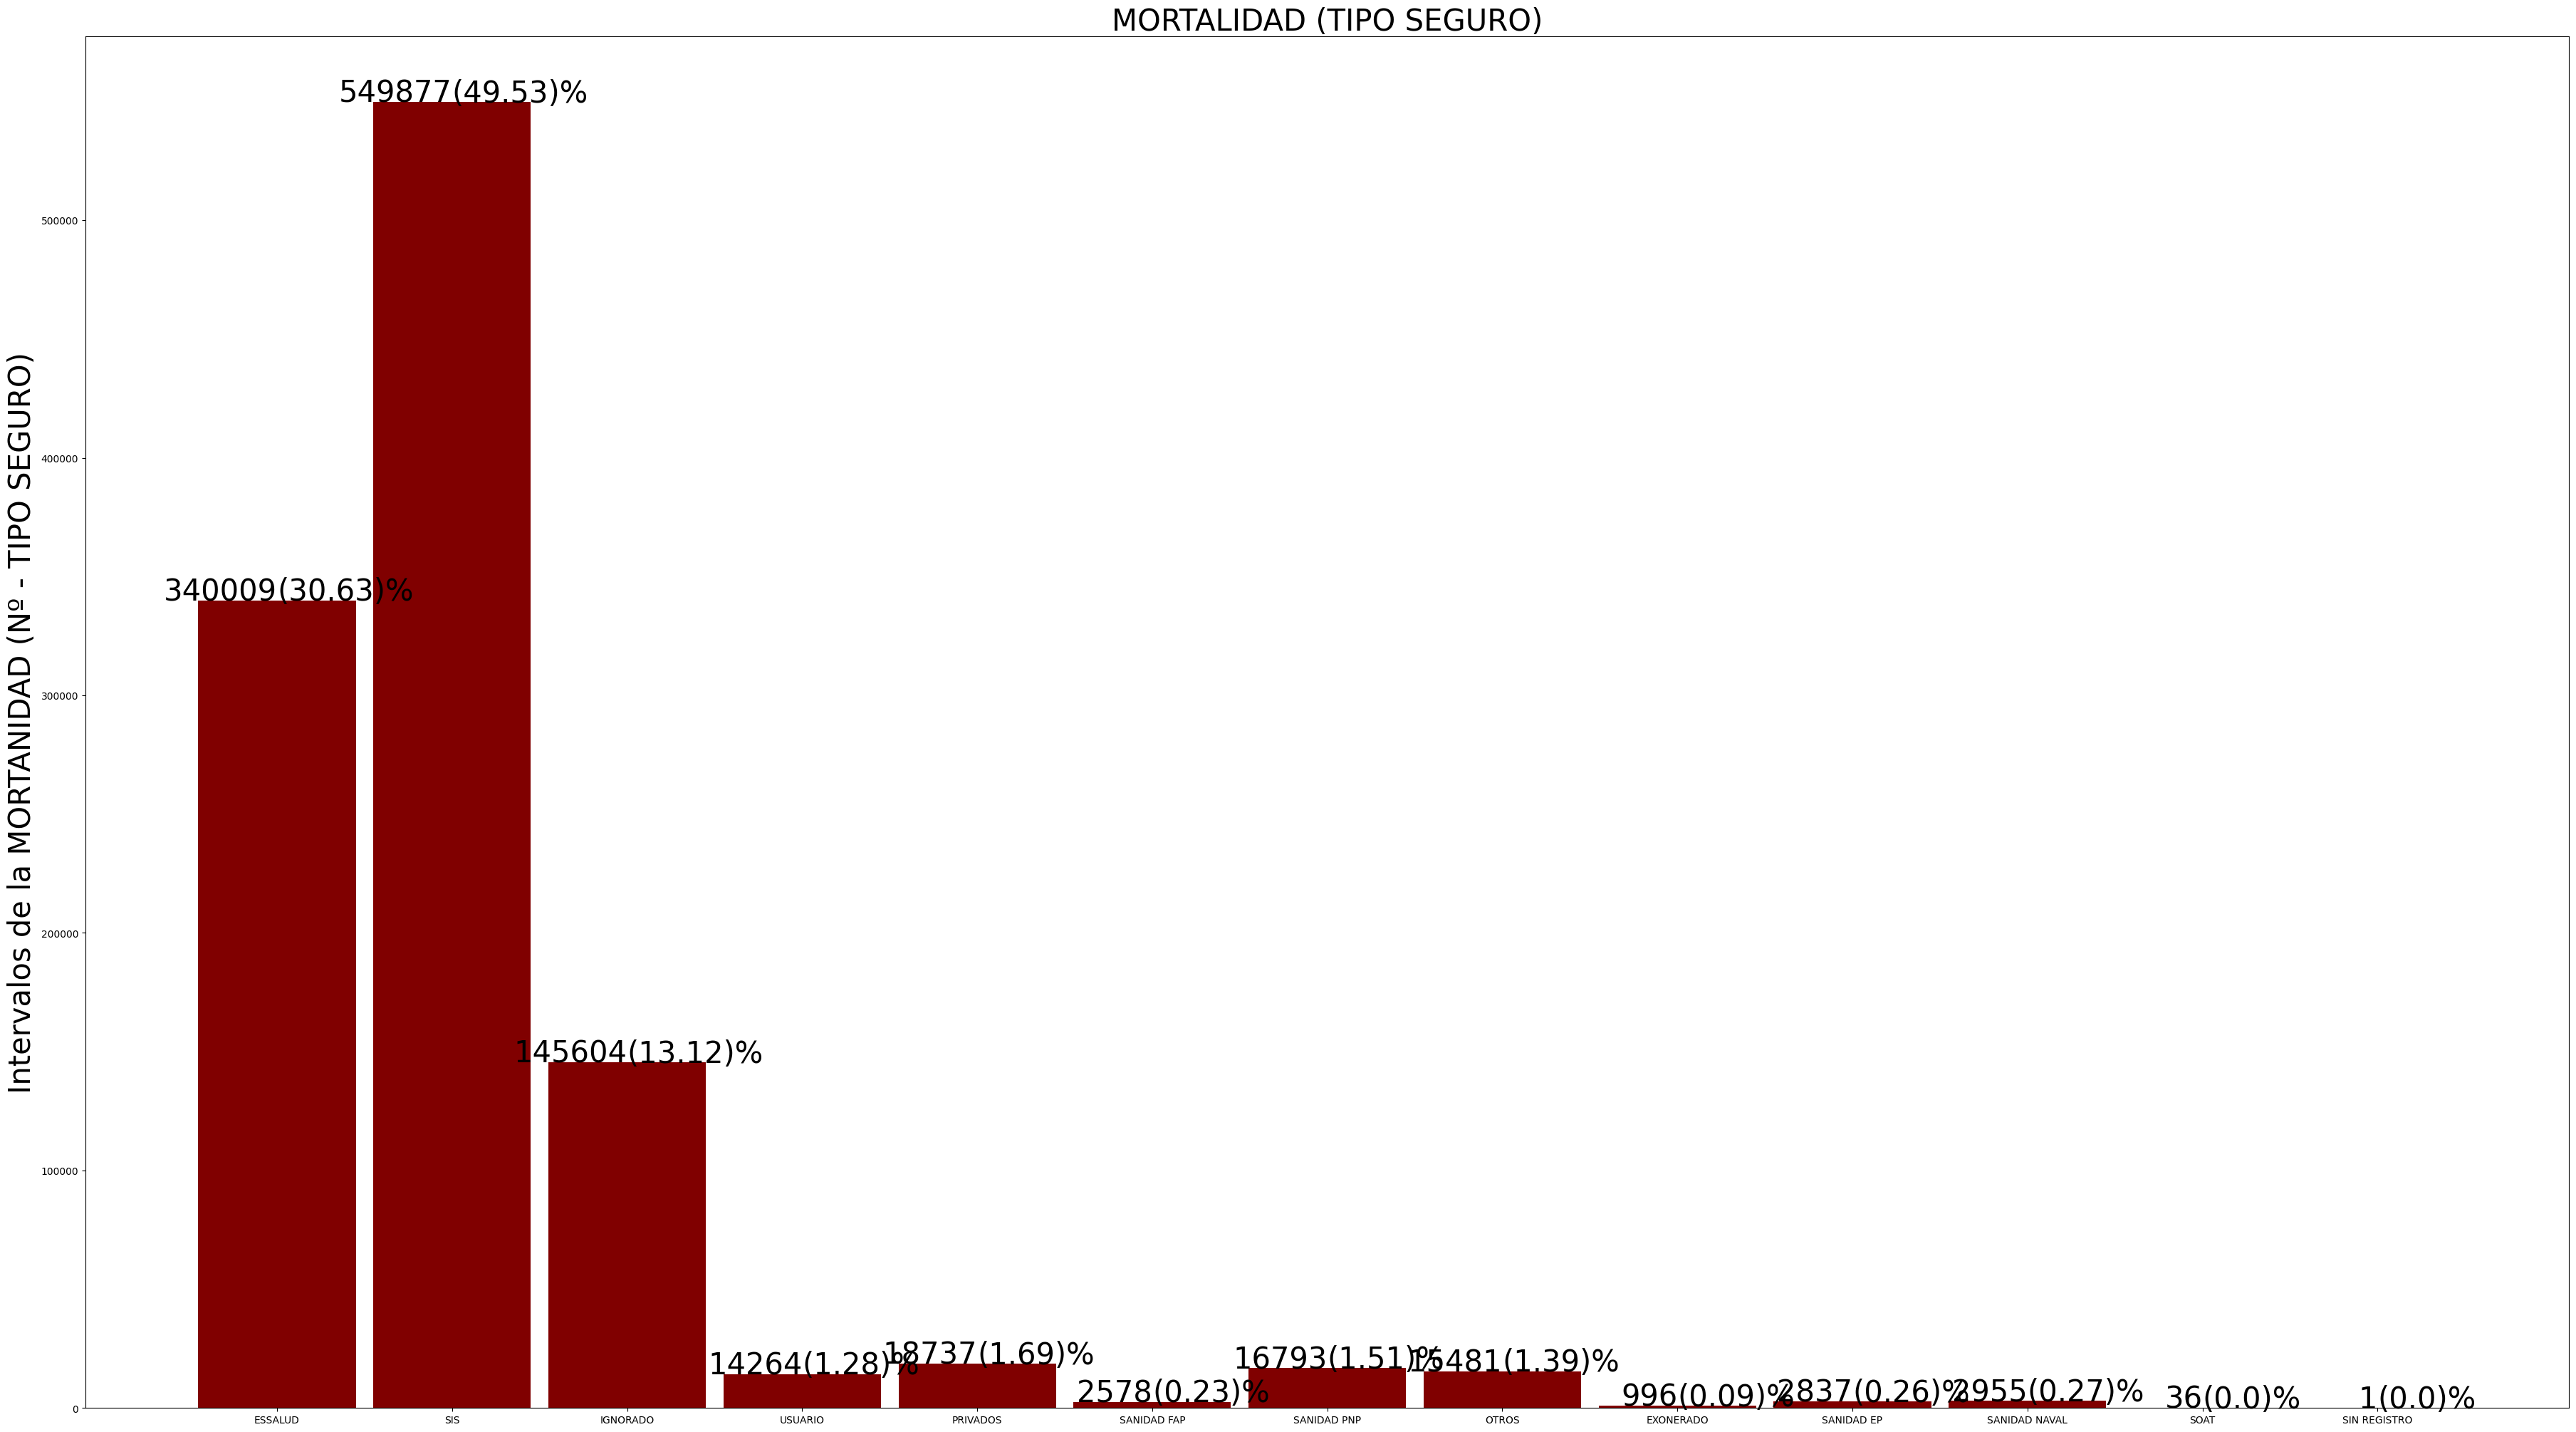

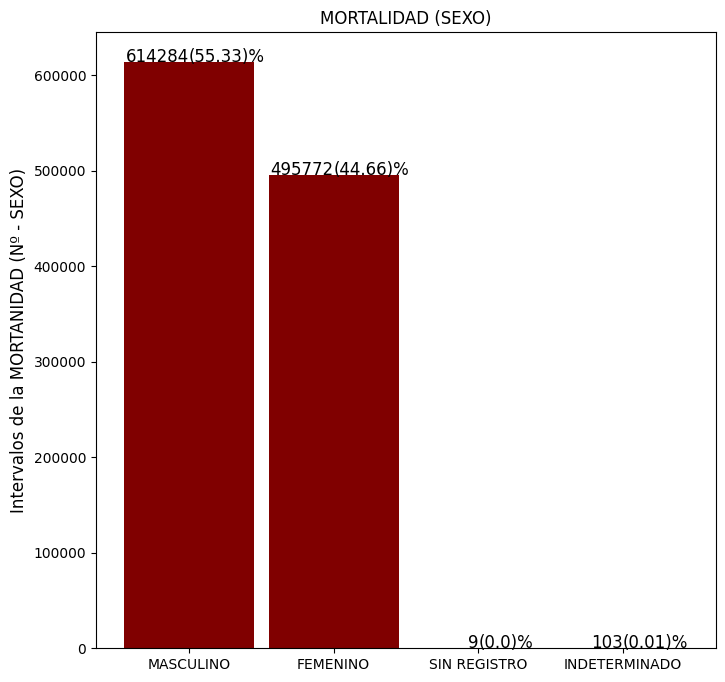

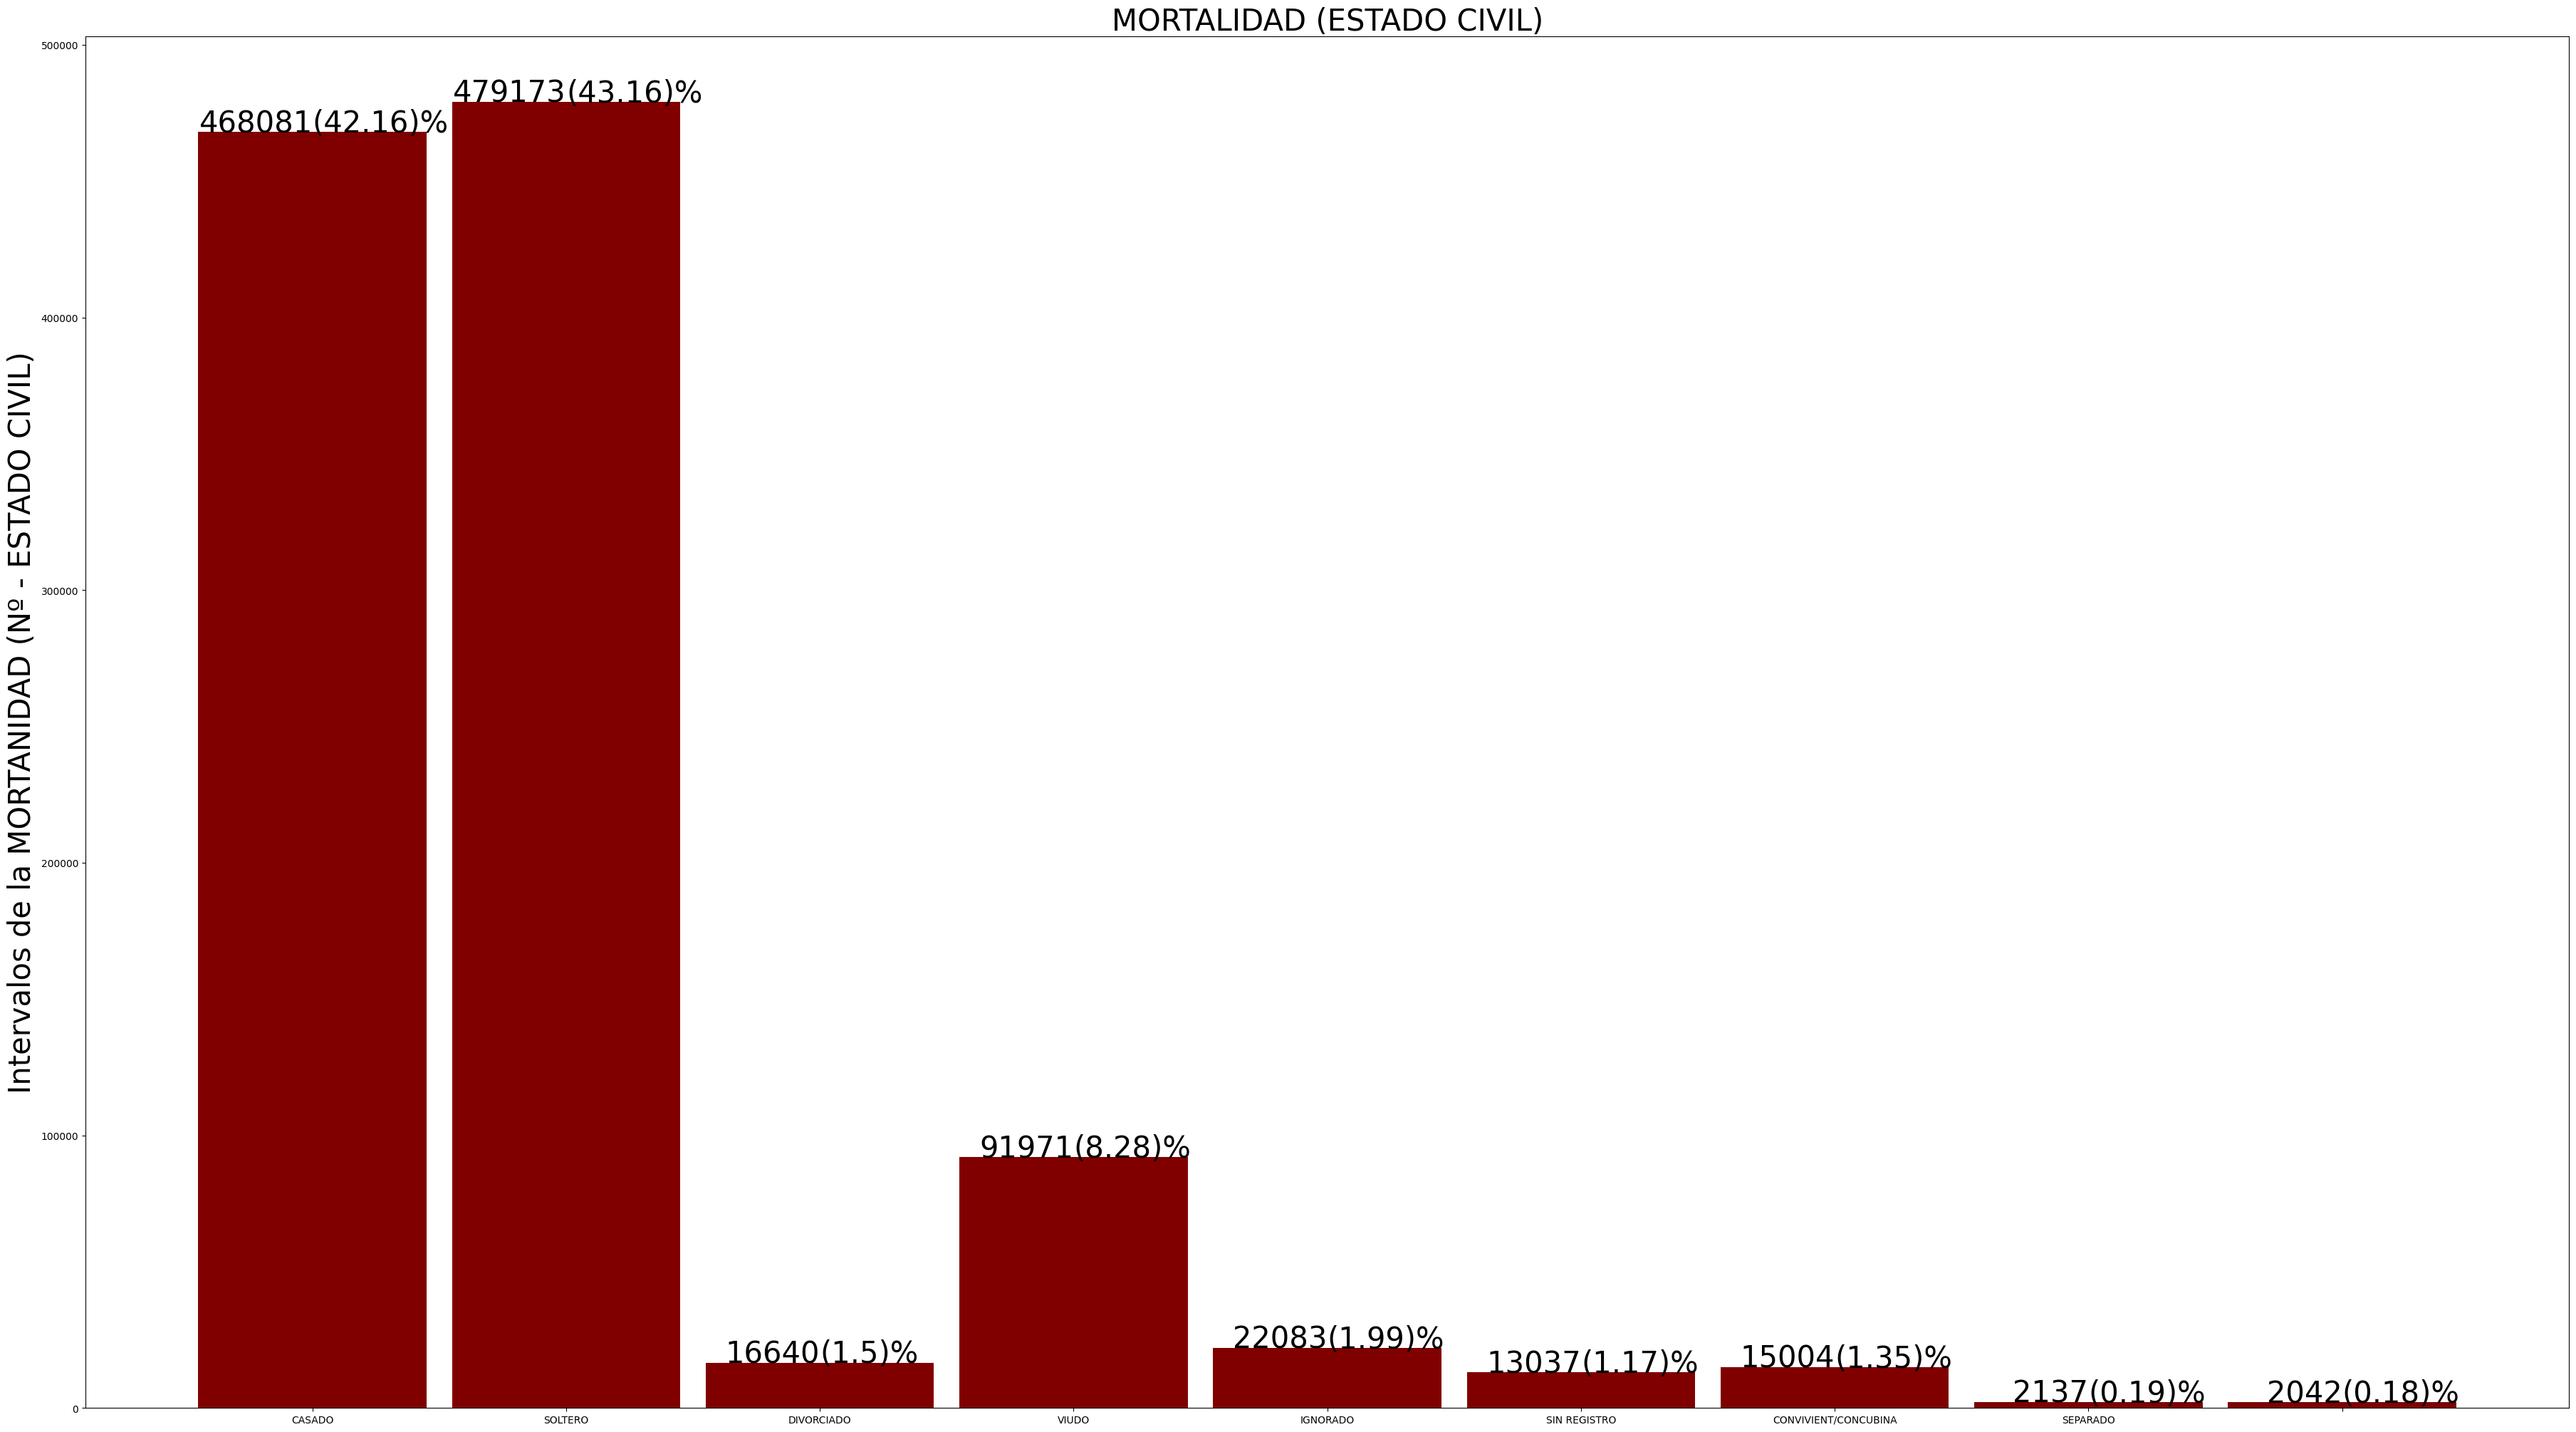

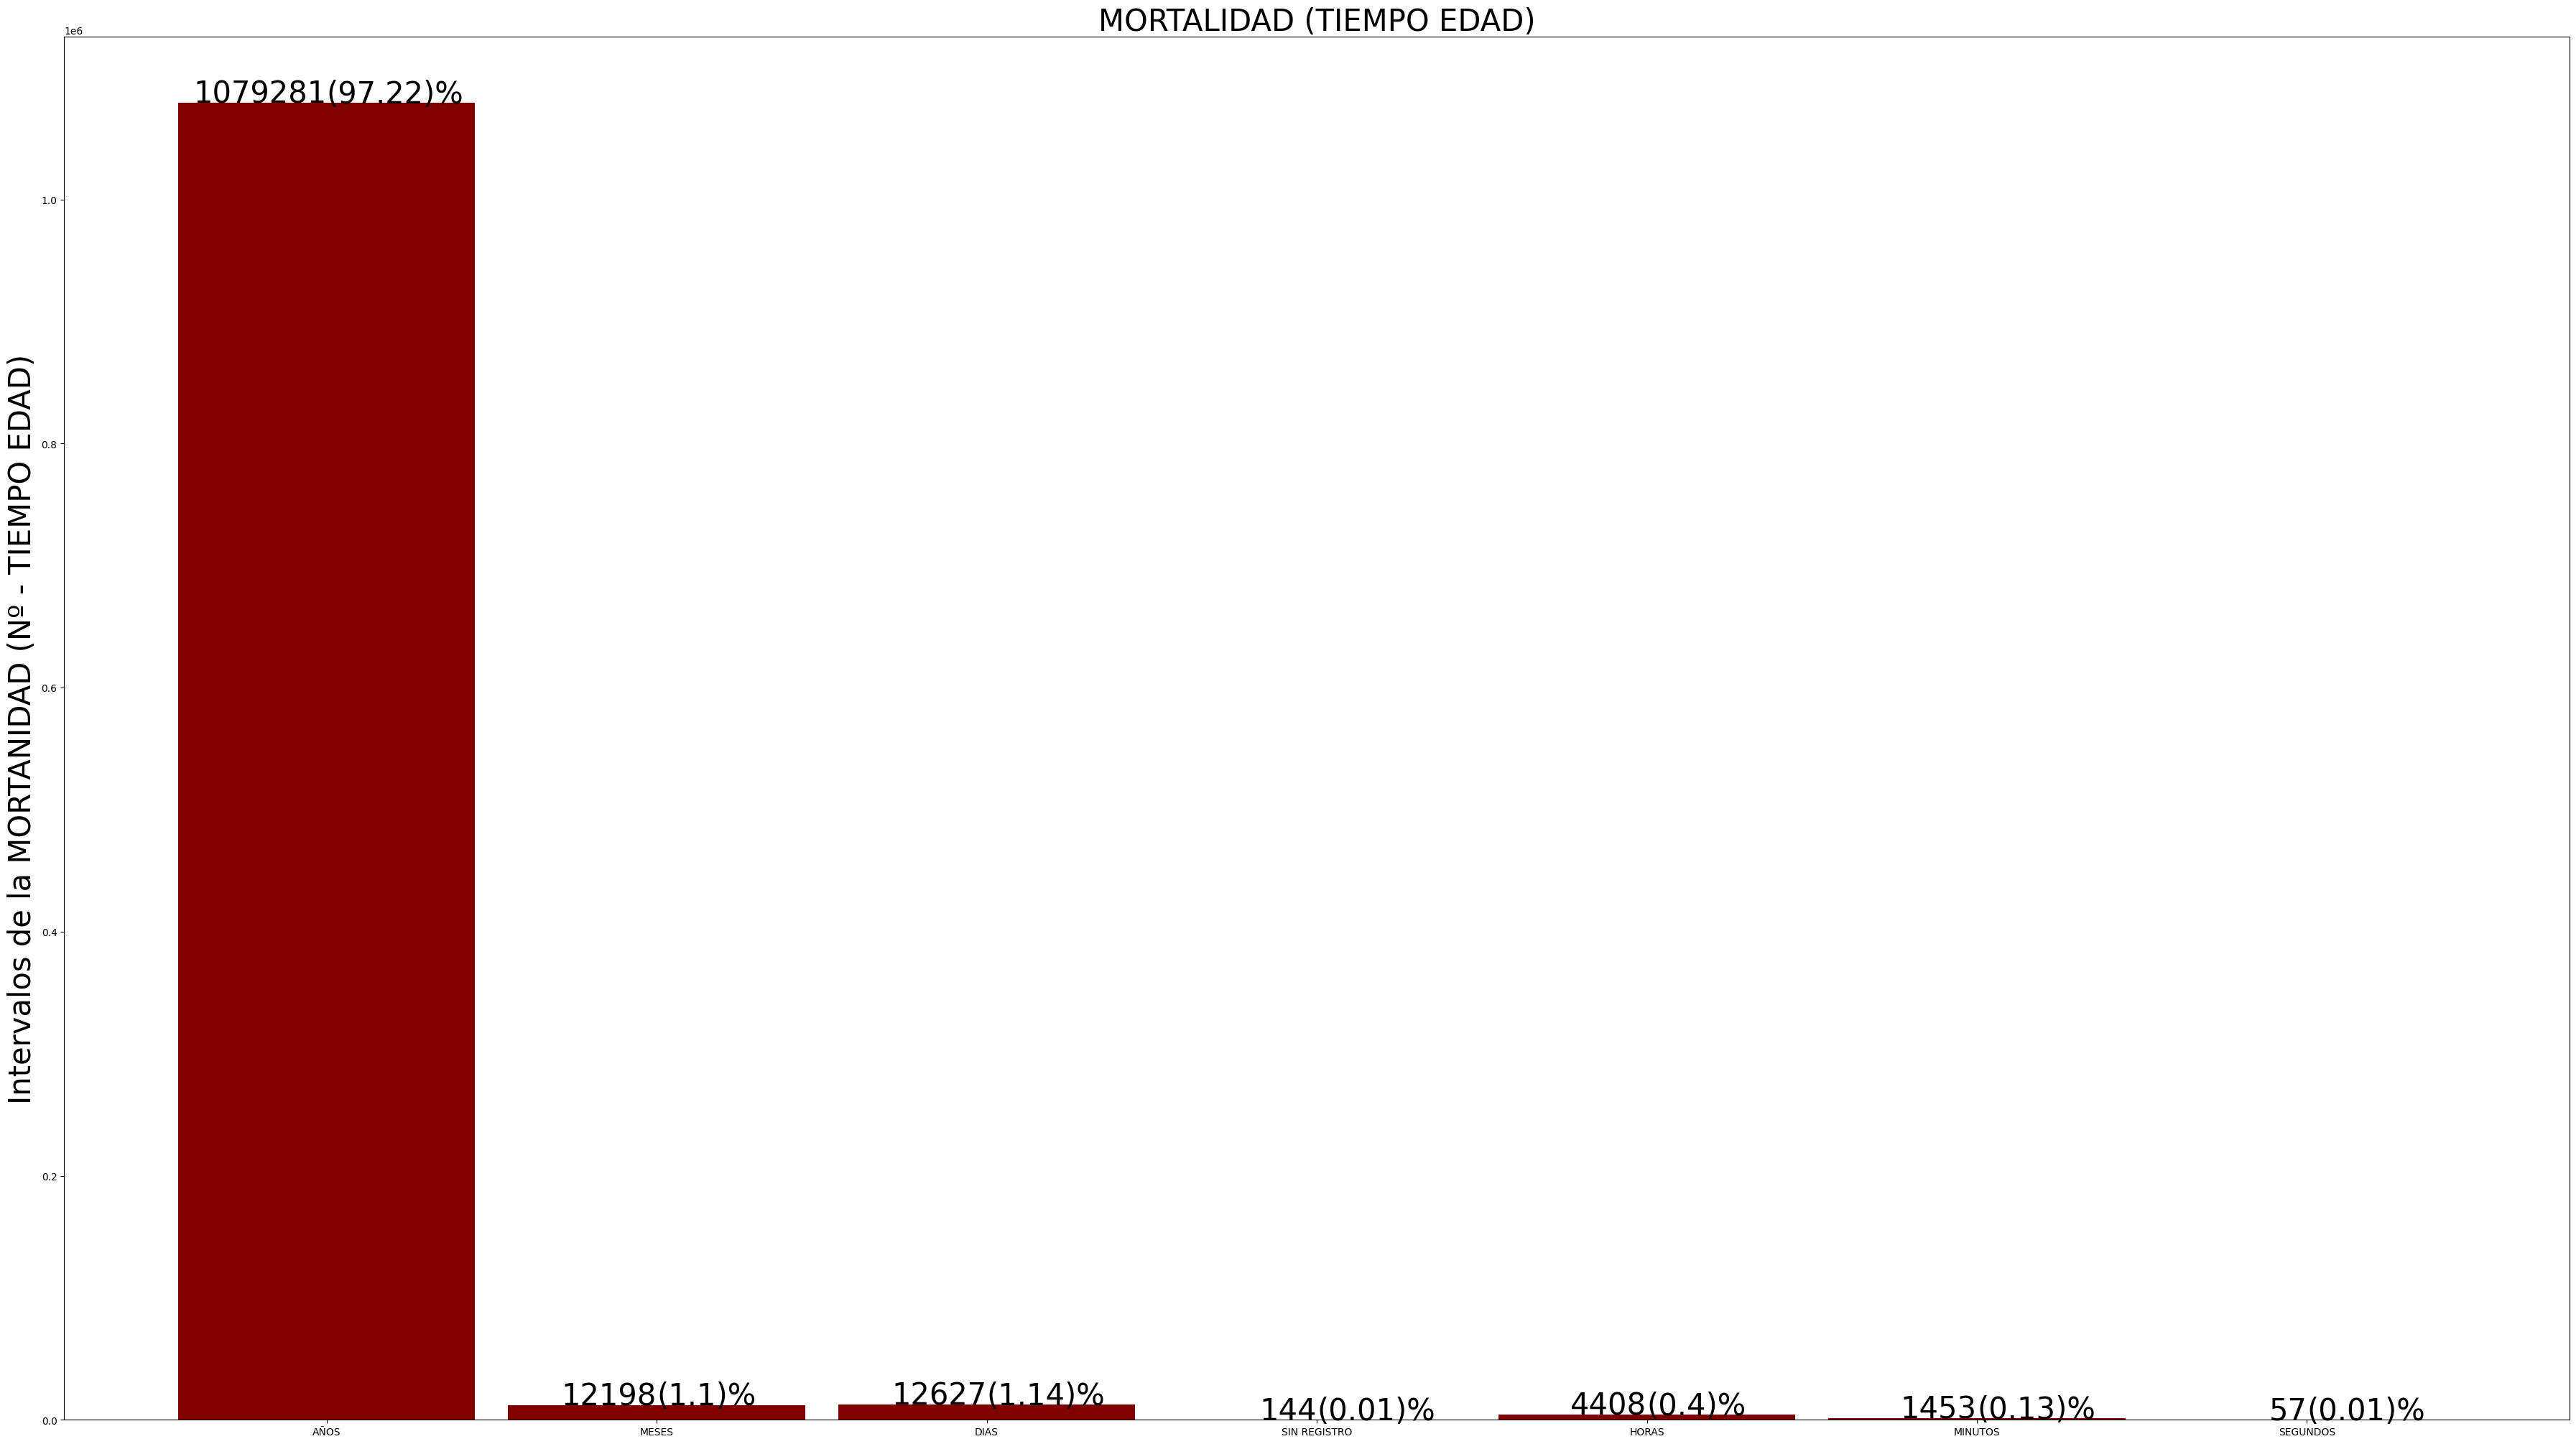

TypeError: 'value' must be an instance of str or bytes, not a int

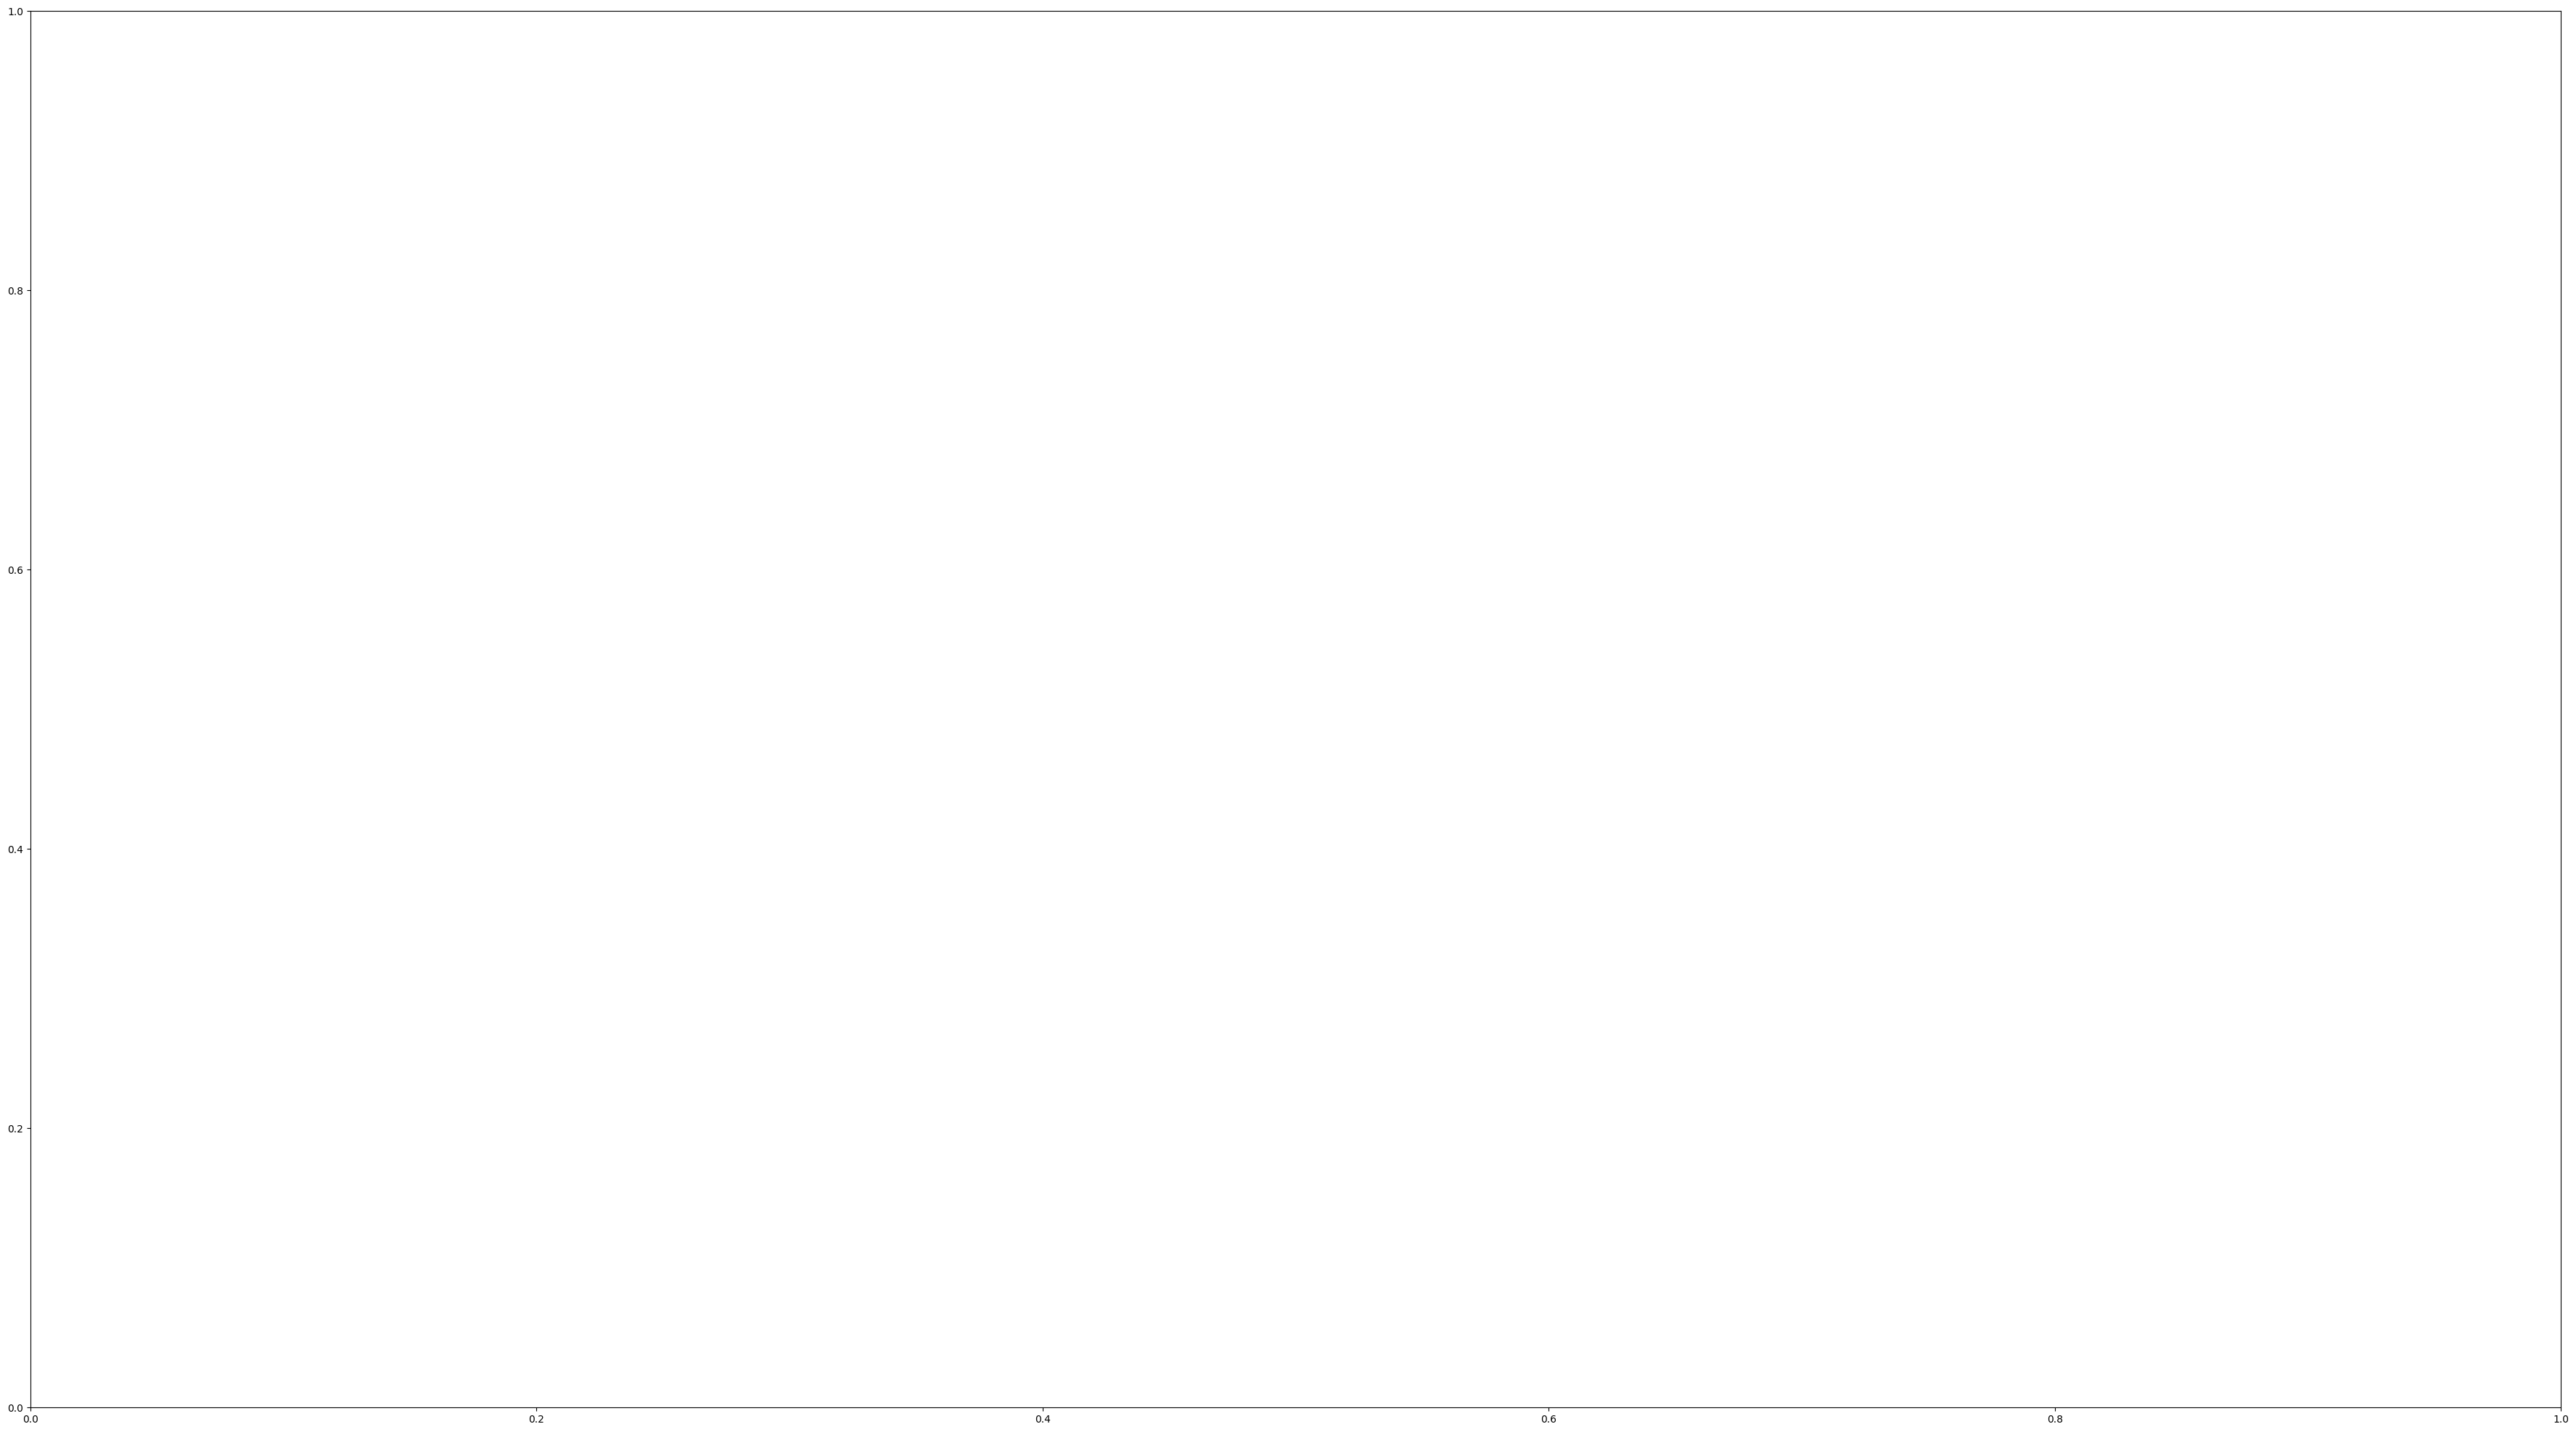

In [13]:
visualizacion_valor(df_data,['TIPO SEGURO','SEXO','ESTADO CIVIL','TIEMPO EDAD','EDAD'],'Nº')

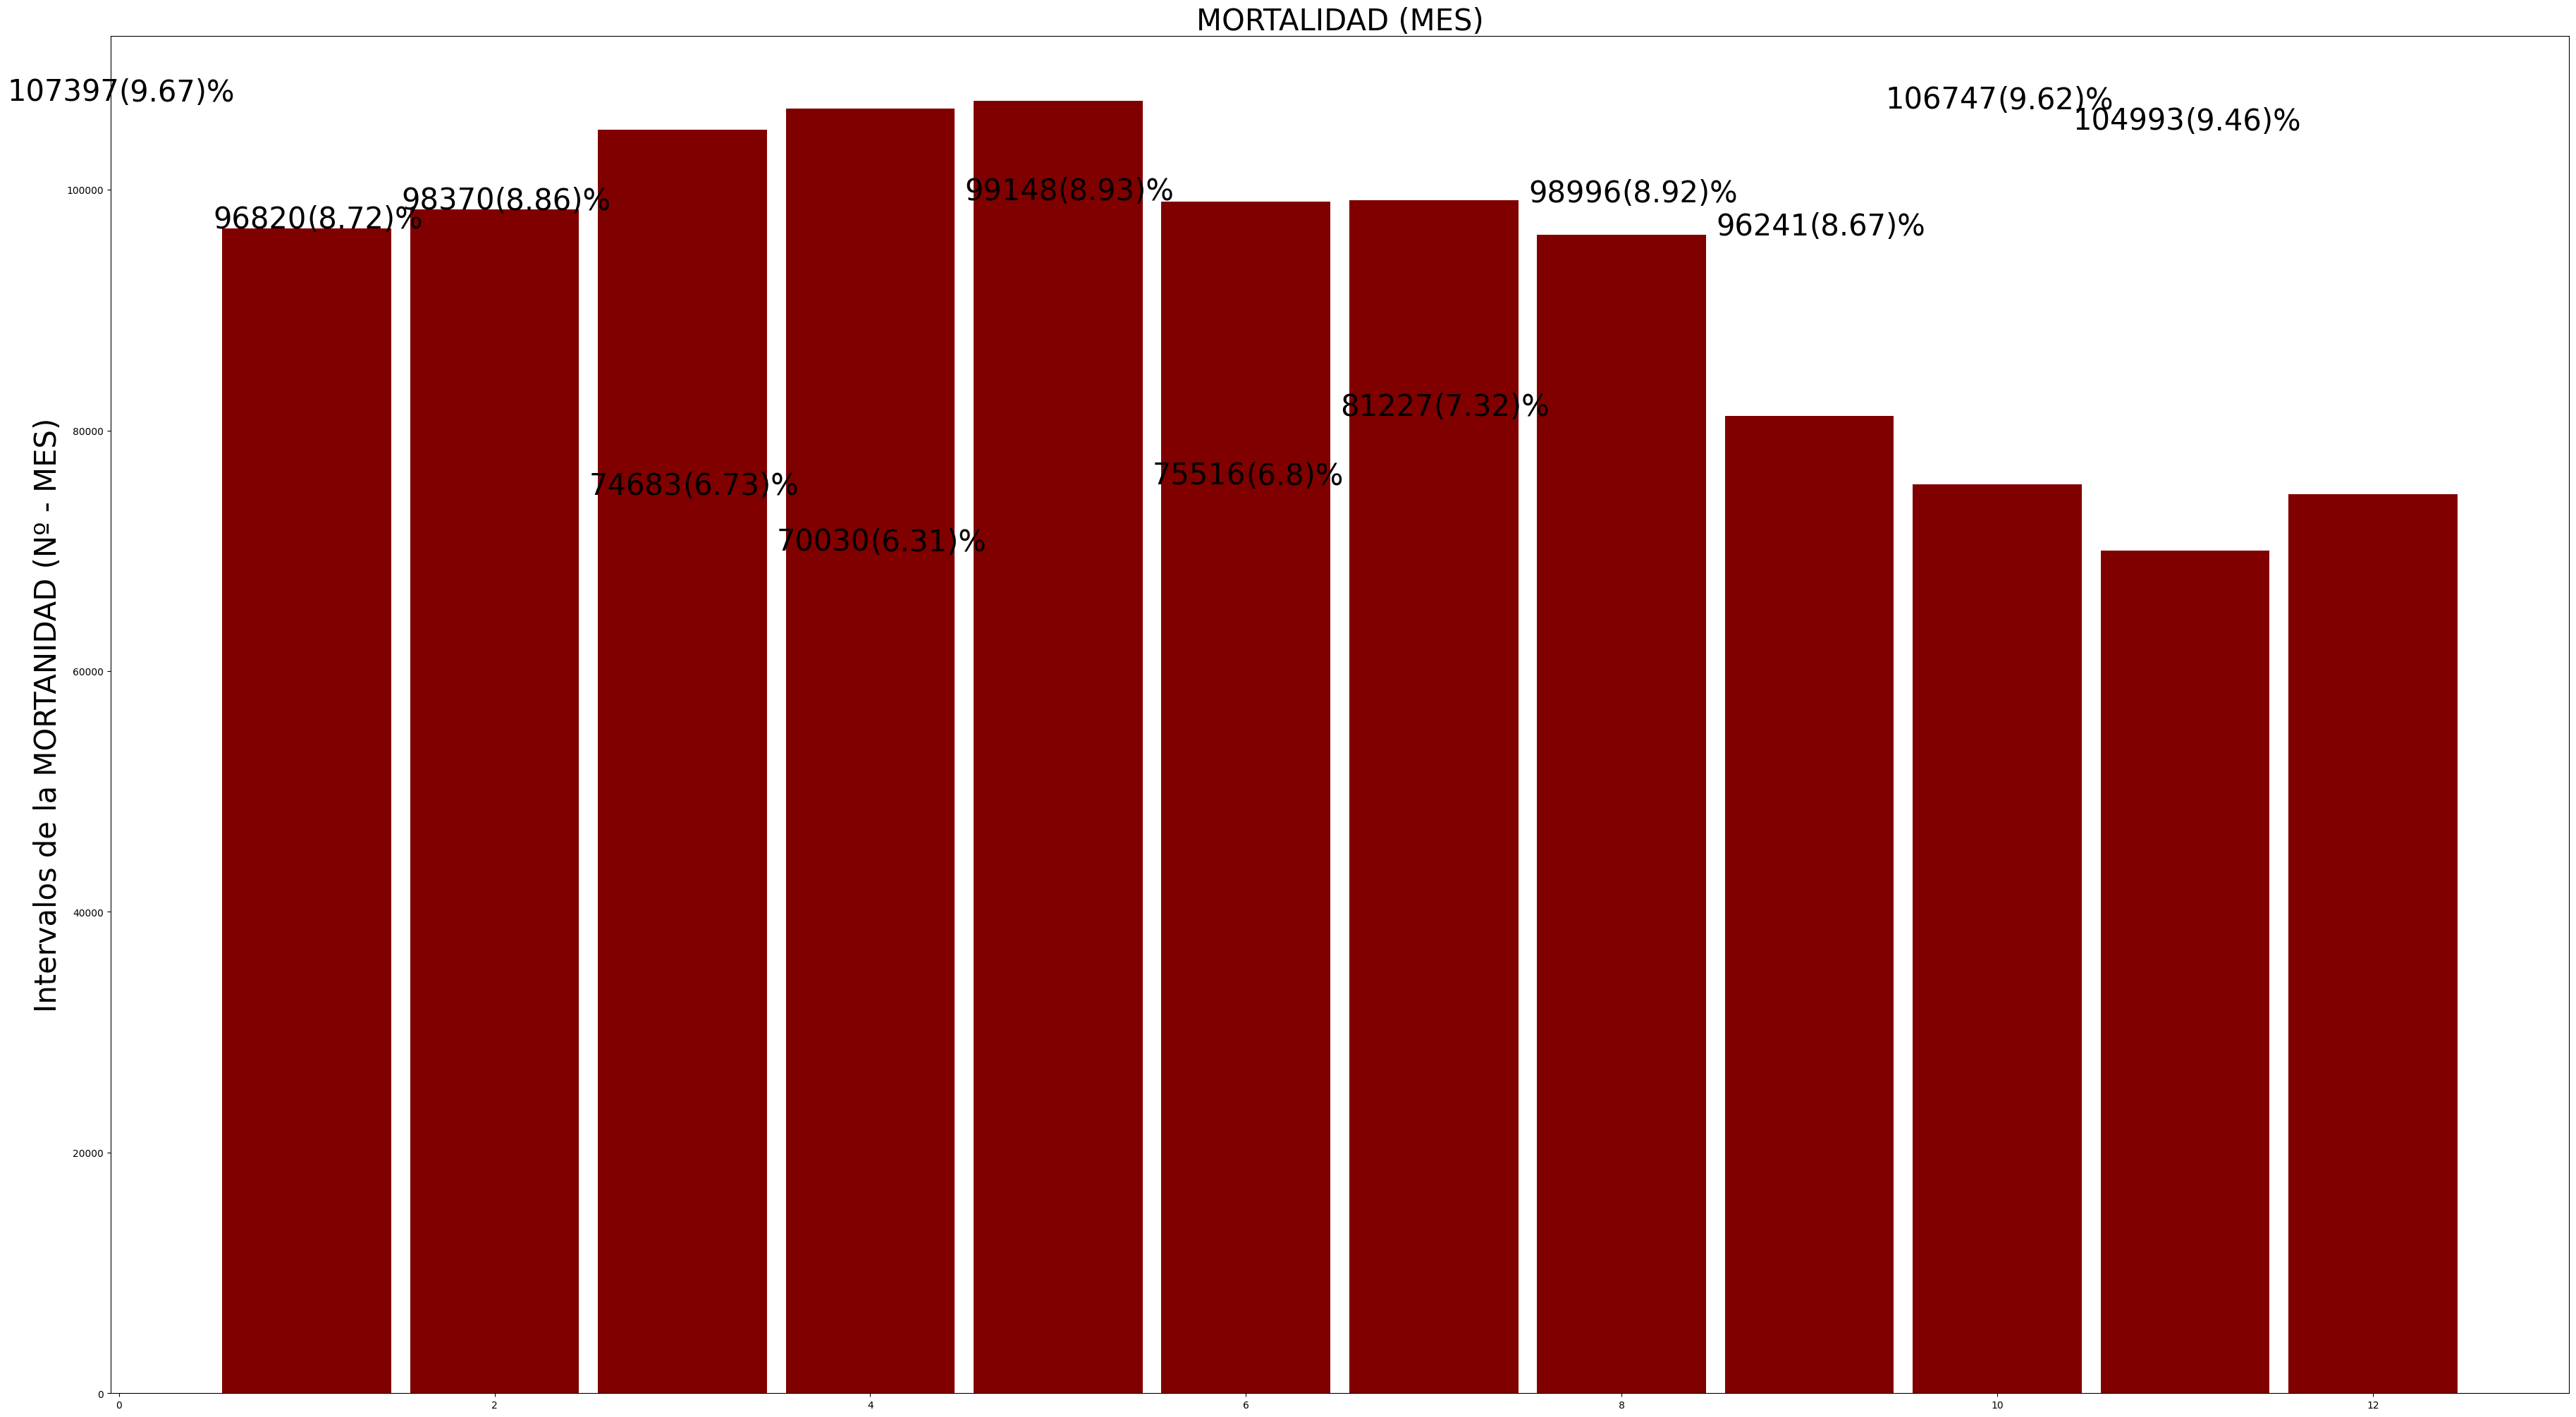

In [14]:
visualizacion_valor(df_data,['MES'],'Nº')

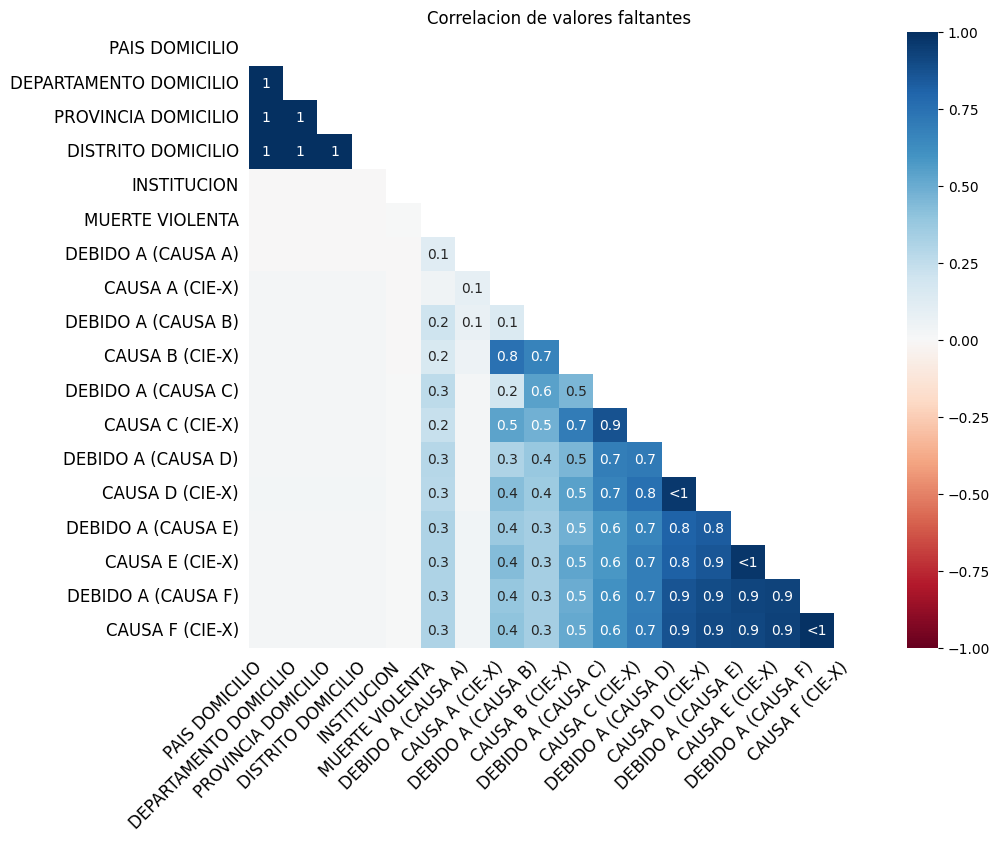

In [15]:
ms.heatmap(df_data,figsize=(10,8),fontsize=12)
plt.title("Correlacion de valores faltantes")
plt.show()

In [16]:
#se tiene que convertir la fechas en array y de forma ordenada
#valor y
dias=df_data['FECHA'].value_counts().sort_index()
dias_mor=np.array(dias.sort_index())


In [17]:
len(dias_mor)

2682

In [18]:
#valor x
FECHA_HIST=df_data['FECHA'].sort_values().unique()

In [19]:
fig=px.line(x=FECHA_HIST[:2682],y=dias,title='Fecha de Mortalidad',
            labels={'x':'Años','y':'Mortalidad'})
fig.update_layout(title_x=0.5)
fig.show()

In [20]:
#vializacion por meses
#identificando la cantidad de dias

inicio=0
for year in df_data.AÑO.sort_values().unique().tolist():
    temp=df_data[df_data.AÑO==year]
    fin=len(temp)+inicio
    #unico
    temp=temp['FECHA'].sort_values().unique()
    #filtamosla fecha del año
    list_fec=df_data[(df_data.AÑO==year)]
    tot_dias=np.array(list_fec['FECHA'].value_counts().sort_index())
    

    fig=px.line(x=temp,y=tot_dias,title='MORTALIDAD POR DIA ({})'.format(year),
                labels={'x':'MESES','y':'MORTALIDAD'})
    fig.update_layout(title_x=0.5)
    fig.show()

    inico=fin

In [21]:
#analisis comparativo

graf=go.Figure()

#suma de mortalidad por sexo
group=df_data['SEXO'].value_counts()
estados=group.index

for i in range(len(estados)):
    nom=estados[i]
    datos=df_data[(df_data['SEXO']==nom)]['FECHA']
    datos=datos.value_counts().sort_index()
    graf.add_trace(go.Scatter(x=df_data.FECHA.sort_values().unique(),y=datos,name=str(nom)))
    graf.update_layout(title='Mortalidad Diaria ({})'.format(estados[i]),title_x=0.5,xaxis_title='ANIO',
                       yaxis_title='CANTIDAD')
    graf.show()

In [22]:
#VISUALIZAICON DE MORTABILIDAD POR EDAD
promedio=df_data[~df_data['EDAD'].isin(['SIN REGISTRO'])]['EDAD'].astype(int).mean()

df_data['EDAD'].replace(['SIN REGISTRO'],round(promedio,0),inplace=True)

df_edad=df_data
dias=df_edad['EDAD'].astype(int).value_counts().sort_index()
dias_mor=np.array(dias.sort_index())

len(dias_mor)

#valor x
FECHA_HIST=df_edad['EDAD'].astype(int).sort_values().unique()

fig=px.line(x=FECHA_HIST[:116],y=dias,title='Eedad de Mortalidad',
            labels={'x':'Edad','y':'Mortalidad'})
fig.update_layout(title_x=0.5)
fig.show()

In [23]:
#EXPLORACION DE ESTADO DE ESTADO - CIVIL
for estado in df_data['ESTADO CIVIL'].unique():
    ver_estado=df_data[df_data['ESTADO CIVIL']==estado]

    #suma de estado civil por
    group=ver_estado['SEXO'].value_counts()
  

    porcentaje=[np.round(i* (100/sum(group.values)),2) for i in group]
    graf=px.bar(x=group.index,y=group.values,color=group.index,text=porcentaje)
    graf.update_traces(textposition='outside')
    graf.update_layout(title='Ventas en categorias ({})%'.format(estado),title_x=0.5,width=600,
                           height=500,xaxis_title='Categorias',yaxis_title='Sales')
    graf.show()
